<a href="https://colab.research.google.com/github/MarcelleMvondo/Iris-flower-classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iris Flower Classification using kNN Algorithm

### Importing the necessary Python libraries that we need

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Load Dataset

In [ ]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Convert the dataset into a DataFrame and add the target_names

In [ ]:
iris_df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target_names']
    )
species = dict(enumerate(iris.target_names))
iris_df["target_names"] = iris_df["target_names"].replace(species)
iris_df.rename(columns={"target_names": "species"}, inplace = True) # Rename the column target_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting the dataset

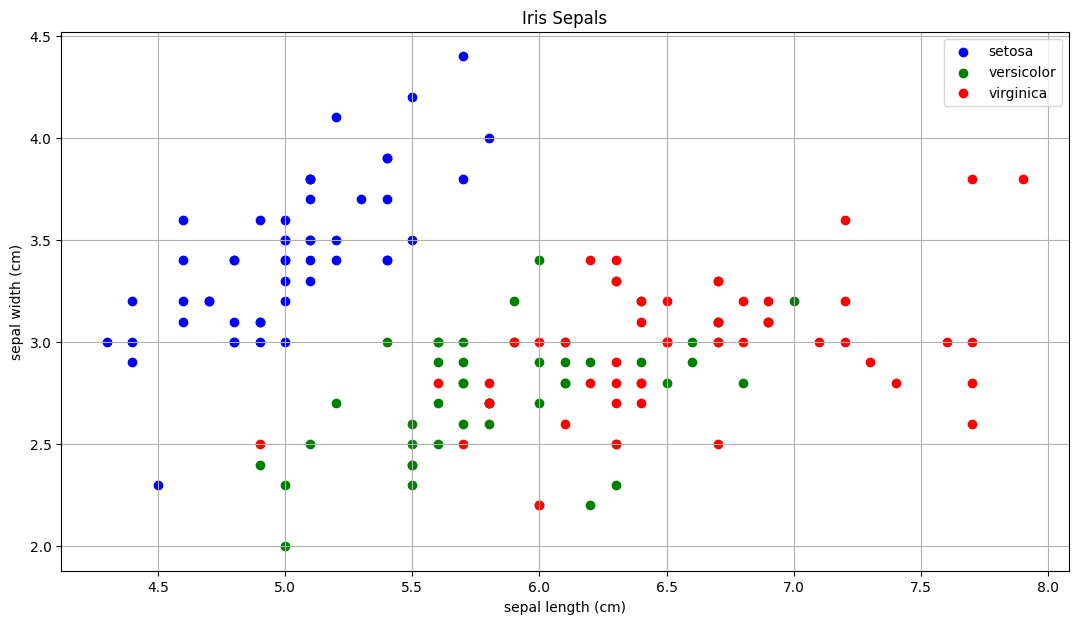

In [ ]:
# create list of colors and class labels
colors = ['blue', 'green', 'red']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

for i in range(3):
    # filter data on each class
    x = iris_df[iris_df['species'] == species[i]]
    # plot the scatter plot
    ax.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = colors[i], label=species[i])

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris Sepals")
ax.legend()

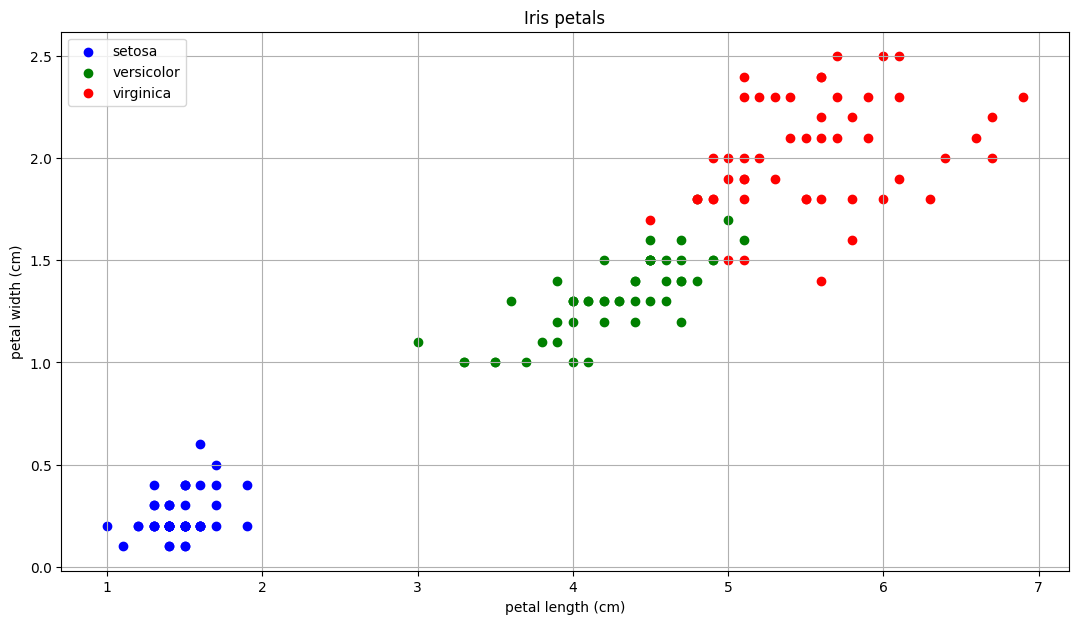

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

for i in range(3):
    # filter data on each class
    x = iris_df[iris_df['species'] == species[i]]
    # plot the scatter plot
    ax.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colors[i], label=species[i])

ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

### Perfoming classification using the KNN algorithm

In [ ]:
# Droping the target and species since we only need the measurements
x = iris_df.iloc[:,:4]
y = iris_df.iloc[:,4]

# Train model
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
k = 12
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)
print("Accuracy of model at K=12 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=12 is 0.9666666666666667


Minimum error:- 0.03333333333333333 at K = 2


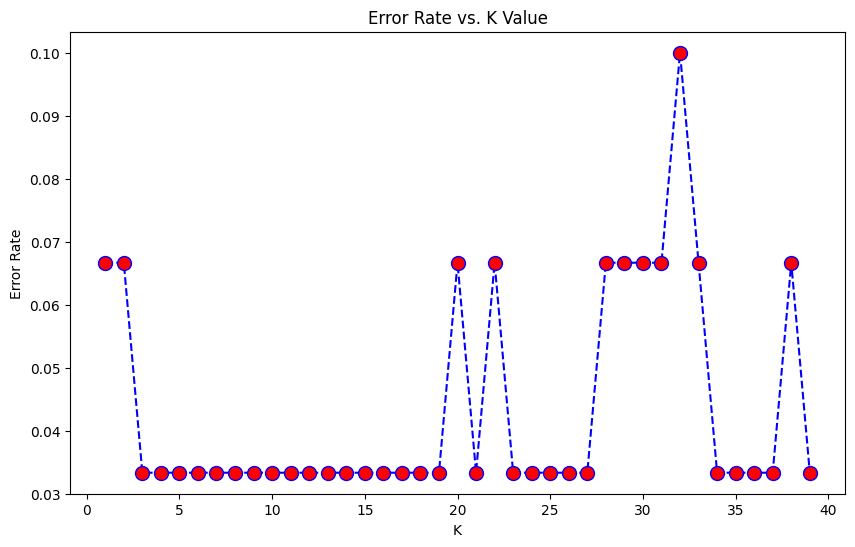

In [ ]:
#Looking for the minimum error rate of K
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 i_pred = knn.predict(x_test)
 error_rate.append(np.mean(i_pred != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9666666666666667 at K = 2


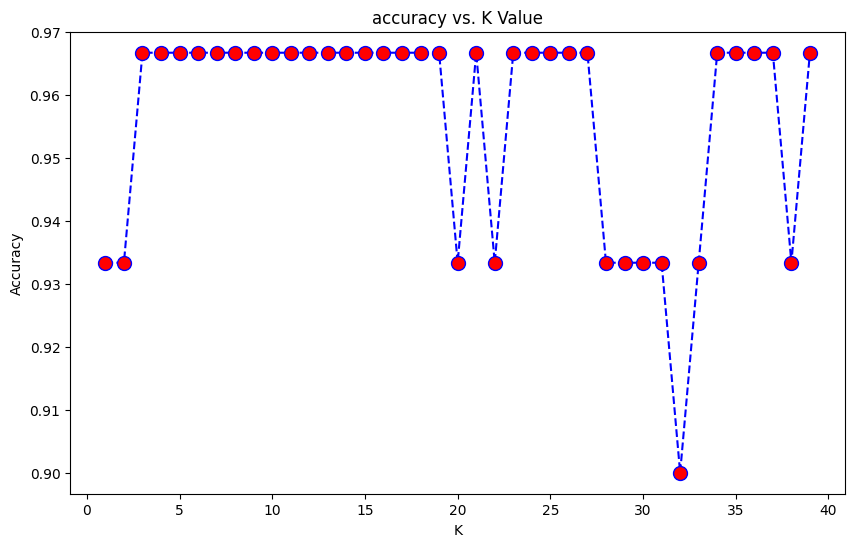

In [ ]:
#Looking for the maximum accuracy rate of K
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Prediction for this given array
x_new = np.array([[6, 3, 5, 2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

